# **Connecting to the google drive**

In [1]:
# File is stored in the drive so we link the drive to access the file 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing the libraries**

In [2]:
# We import the required modules for machine learning, like numpy, pandas and matplotlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Importing the dataset**

In [4]:
# we import the data using pandas module and import the 3rd and 4th column into x and y respectively
data = pd.read_csv('/content/drive/MyDrive/SVR,DT,RF,Logical Regression/Position_Salaries_poly-1.csv')
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values
print(data)
print("----------------------------------------------------------------------")
print(x)
print("----------------------------------------------------------------------")
print(y)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
----------------------------------------------------------------------
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
----------------------------------------------------------------------
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [6]:
y=y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# **Feature Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler
StdS_X = StandardScaler()
StdS_y = StandardScaler()
x = StdS_X.fit_transform(x)
y = StdS_y.fit_transform(y)
print("Scaled x:")
print(x)
print("Scaled y:")
print(y)

Scaled x:
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
Scaled y:
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# **Training the model**

In [9]:
# import the model
from sklearn.svm import SVR
# create the model object
regressor = SVR(kernel = 'rbf')
# fit the model on the data
regressor.fit(x, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# **Predicting the result**

In [12]:
A=regressor.predict(StdS_X.transform([[6.5]]))
print(A)
# Convert A to 2D
A = A.reshape(-1,1)
print(A)
# Taking the inverse of the scaled value
A_pred = StdS_y.inverse_transform(A)
print(A_pred)

[-0.27861589]
[[-0.27861589]]
[[170370.0204065]]


# **Visualising the Results**



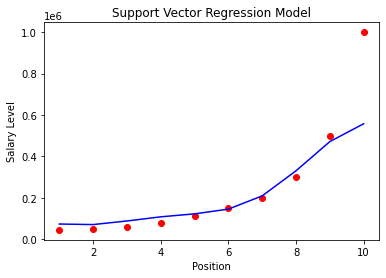

In [14]:
# inverse the transformation to go back to the initial scale
plt.scatter(StdS_X.inverse_transform(x), StdS_y.inverse_transform(y), color = 'red')
plt.plot(StdS_X.inverse_transform(x), StdS_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color = 'blue')
# add the title to the plot
plt.title('Support Vector Regression Model')
# label x axis
plt.xlabel('Position')
# label y axis
plt.ylabel('Salary Level')
# print the plot
plt.show()

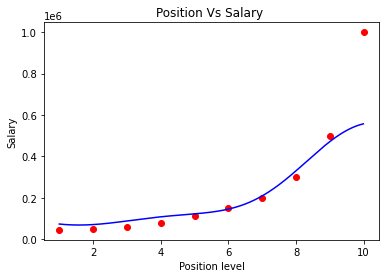

In [25]:
# Plotting the polynomial regression but smoothing the curve 
X_grid = np.arange(min(StdS_X.inverse_transform(x)), max(StdS_X.inverse_transform(x)), 0.01) #  0.01 to make the graph smoother
X_grid = X_grid.reshape((len(X_grid), 1)) # reshapes the array to be a matrix
plt.scatter(StdS_X.inverse_transform(x), StdS_y.inverse_transform(y), color = 'red')
plt.plot(X_grid,  StdS_y.inverse_transform(regressor.predict(StdS_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Position Vs Salary ') # adds tittle to the plot
plt.xlabel('Position level') # adds label to the x-axis
plt.ylabel('Salary') # adds label to the y-axis
plt.show() # prints our plot